<a href="https://colab.research.google.com/github/christmasv/Proyectos-de-ML/blob/Clasificacion-Aprendizaje-Supervisado/absentismo_modelo_rlogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresión Logística: Absentismo Transformando la Cultura Laboral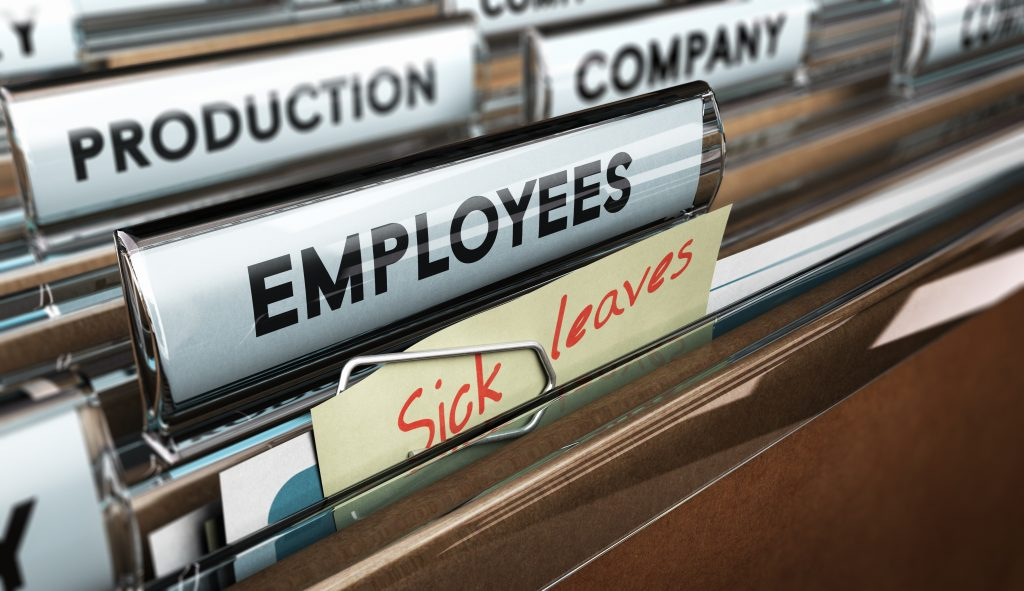**

# Regresión Logística | Absentismo Transformando la Cultura Laboral


 **Author** = [Christopher Soto](https://twitter.com/csv_81)

    @article{khrizoto,     
    Title        = {Regresión Logística | Absentismo Transformando la Cultura Laboral},
    Howpublished = {\url{https://khrizoto.wordpress.com/}},
    Year         = {2024}

**Descripción:**

El absentismo laboral, la ausencia intencional o habitual de un empleado en el trabajo, puede impactar negativamente en la productividad y las finanzas de una empresa. Para abordar este problema, utilizo un conjunto de datos del repositorio Welcome to the *UC Irvine Machine Learning Repository*, basado en un estudio sobre predicción del absentismo laboral. Mi objetivo es predecir el absentismo a partir de diversas variables. Las "horas" y la "fecha" son nuestras variables dependientes, mientras que otras columnas representan variables independientes que pueden ayudarnos a predecir futuras ausencias. A continuación, explico cómo preprocesar estas variables para determinar su utilidad en nuestro análisis.


# Acerca del conjunto de datos
# **Contexto**
La base de datos fue creada con registros de ausentismo laboral de julio de 2007 a julio de 2010 en una empresa de mensajería en Brasil.

* Número de instancias: 700
* Número de atributos: 11
* Valores faltantes: 0

**Fuentes Datos**: https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

## **Razones de Ausencia**
1. Ciertas enfermedades infecciosas y parasitarias
2. Neoplasias
3. Enfermedades de la sangre y de los órganos hematopoyéticos y ciertos trastornos que afectan al mecanismo inmunológico
4. Enfermedades endocrinas, nutricionales y metabólicas
5. Trastornos mentales y del comportamiento
6. Enfermedades del sistema nervioso
7.  Enfermedades del ojo y sus anexos
8. Enfermedades del oído y apófisis mastoides.
9. Enfermedades del sistema circulatorio
10. Enfermedades del sistema respiratorio.
11. Enfermedades del aparato digestivo
12. Enfermedades de la piel y del tejido subcutáneo.
13. Enfermedades del sistema musculoesquelético y del tejido conectivo.
14. Enfermedades del aparato genitourinario.
15. Embarazo, parto y puerperio
16. Ciertas condiciones originadas en el período perinatal
17. Malformaciones congénitas, deformaciones y anomalías cromosómicas
18. Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte
19. Lesiones, intoxicaciones y otras consecuencias de causas externas
20. Causas externas de morbilidad y mortalidad
21. Factores que influyen en el estado de salud y el contacto con los servicios de salud.

Y 7 categorías sin ICD:

22. Seguimiento de pacientes.
23. Consulta médica
24. Donación de sangre
25. Exámenes de laboratorio
26. Ausencia injustificada
27. Fisioterapia
28. Consulta dental

# 0. Preparando entorno de trabajo

In [1]:
# pip install pygam

In [2]:
# Importamos librerias Necesarias para desarrollar el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression #, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score

import statsmodels.api as sm
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE



In [3]:
## configuracion inicial viz ##
sns.set(font_scale=1.2)
col = '#3B1C8C'
cm = 'viridis'

In [4]:
# Definiendo directorio de datos
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [5]:
# Carga del dataset de trabajo
data = pd.read_csv ('original.csv')
data.head()



,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2



# 1. Analisis Exploratorio de los Datos

### 1.1 - Analisis de estadísticas descriptivas

In [6]:
# Este método devuelve un DataFrame que incluye varias estadísticas descriptivas,
# como el número de muestras, el valor medio, la desviación estándar, el valor mínimo,
# el valor máximo, la mediana y los valores correspondientes a los percentiles 25% y 75%

data.describe()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,17.951429,19.411429,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,11.028144,8.356292,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,1.000000,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,18.000000,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,28.000000,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,36.000000,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


In [7]:
# Al llamar a este método en un DataFrame, se proporciona un resumen conciso que
# incluye el número total de valores no nulos, los tipos de datos de cada columna,
# el uso de memoria y el índice de rango.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


### 1.2 - Transformamos y Extraemos Month, Day of week de la variable Date

In [8]:
data.Date = pd.to_datetime(data.Date, format='%d/%m/%Y')

In [9]:
data.Date.head(5)

0   2015-07-07
1   2015-07-14
2   2015-07-15
3   2015-07-16
4   2015-07-23
Name: Date, dtype: datetime64[ns]

In [10]:
data.Date[0]

Timestamp('2015-07-07 00:00:00')

In [11]:
data.Date[0].month

7

In [12]:
lista_meses = []
for i in range(len(data)):
    lista_meses.append(data.Date[i].month)

In [13]:
data['Month Value'] = lista_meses
data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value
0,11,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,36,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,3,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,7,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,11,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,7


In [14]:
data['Month Value'] = lista_meses
data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value
0,11,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,36,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,3,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,7,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,11,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,7


In [15]:
#Extraer el dia de la semana
data.Date[0].weekday()

1

In [16]:
def dia_diasemana(data):
    return data.weekday()

In [17]:
data['Day of the Week'] = data.Date.apply(dia_diasemana)

In [18]:
data.columns

Index(['ID', 'Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours',
       'Month Value', 'Day of the Week'],
      dtype='object')

In [19]:
data.Education.value_counts()

Education
1    583
3     73
2     40
4      4
Name: count, dtype: int64

In [20]:
data.Education = data.Education.map({
                            1:0,
                            2:1,
                            3:1,
                            4:1
                            })

In [21]:
data.Education.value_counts()

Education
0    583
1    117
Name: count, dtype: int64

In [22]:
data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,11,26,2015-07-07,289,36,33,239.554,30,0,2,1,4,7,1
1,36,0,2015-07-14,118,13,50,239.554,31,0,1,0,0,7,1
2,3,23,2015-07-15,179,51,38,239.554,31,0,0,0,2,7,2
3,7,7,2015-07-16,279,5,39,239.554,24,0,2,0,4,7,3
4,11,23,2015-07-23,289,36,33,239.554,30,0,2,1,2,7,3


### 1.3 - Division de variables por tipo "Numericas" y " Categoricas" Distribución de las variables

In [23]:
# Dividimos la variales numericas y categoricas
categorical_atts = ['Reason for Absence','Date','Month Value', 'Day of the Week','Education']
numerical_atts = data.drop(columns=categorical_atts).columns.to_list()

In [24]:
# número de valores únicos en atributos categóricos
data[categorical_atts].nunique()

Reason for Absence     28
Date                  432
Month Value            12
Day of the Week         7
Education               2
dtype: int64

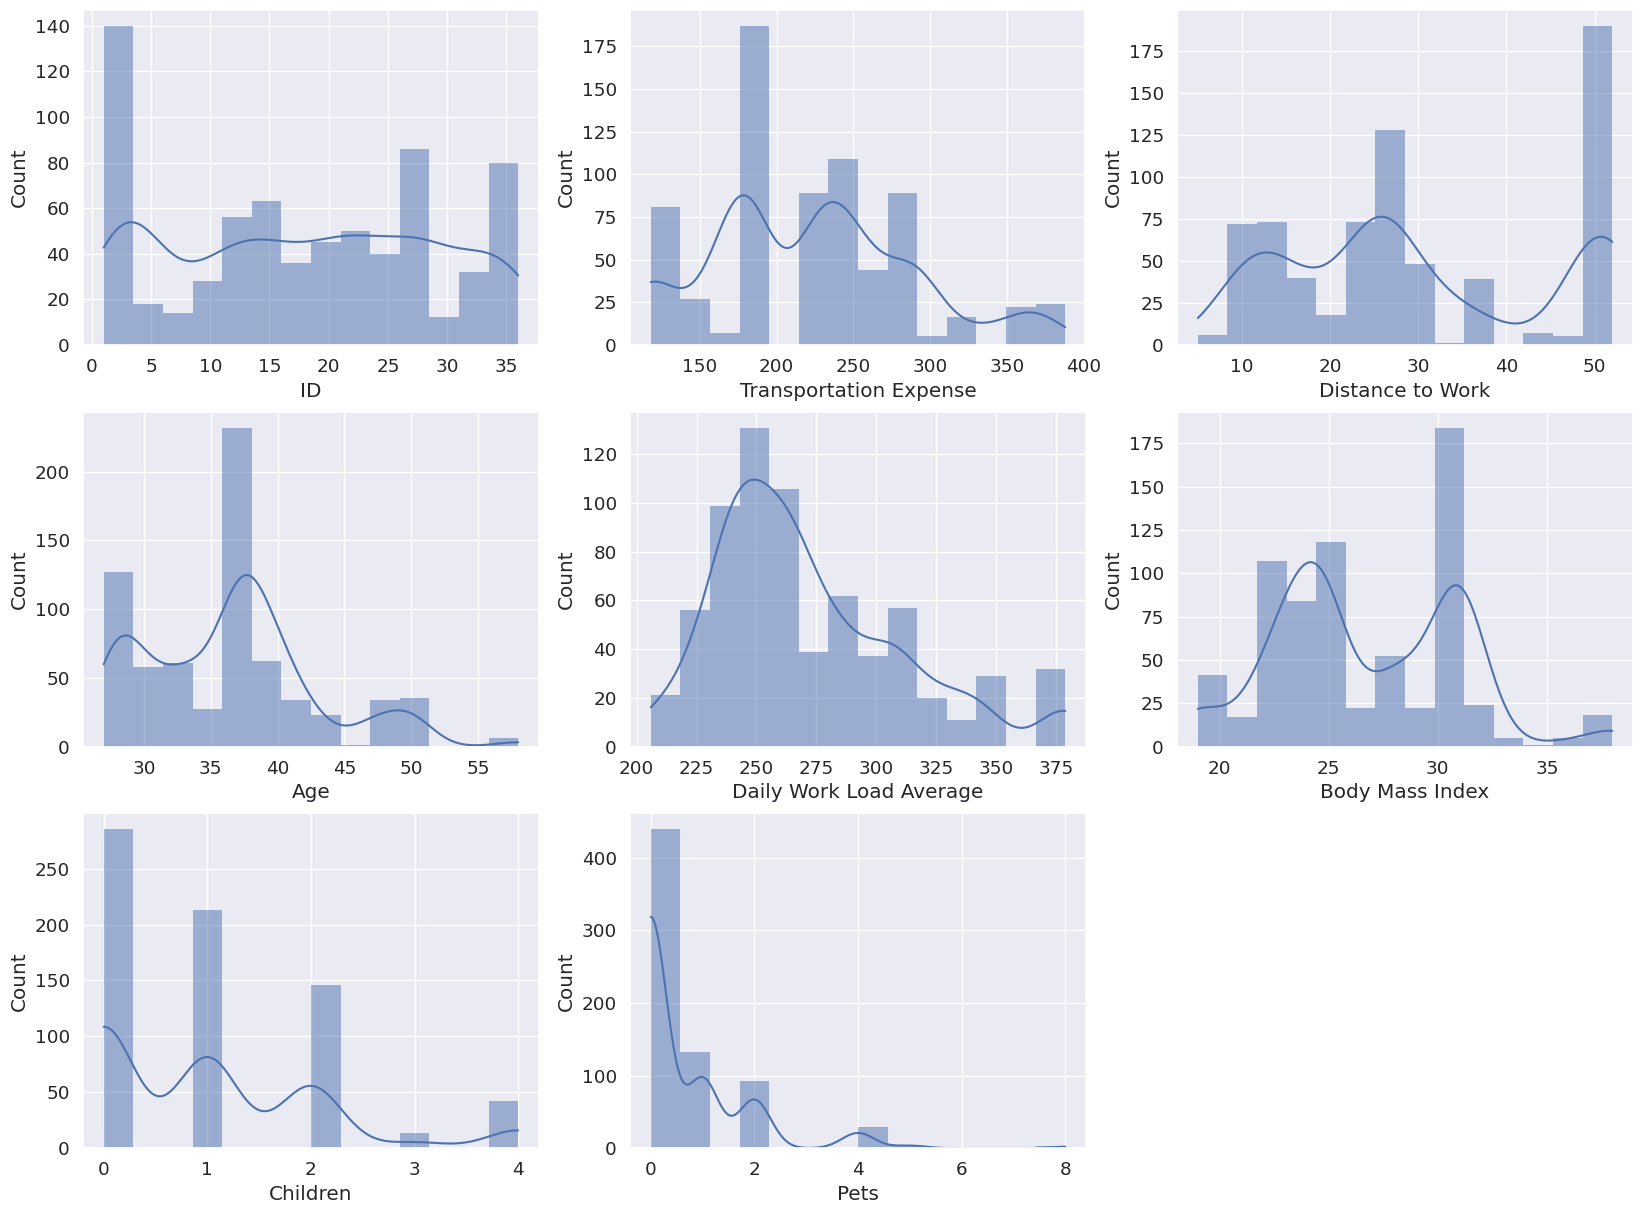

In [25]:
# graficamos la distribucion de las variables numericas
num_df = data[numerical_atts]
plt.figure(figsize=(20,20))
for i in range(1, 9):
    plt.subplot(4, 3, i)
    sns.histplot(num_df[num_df.columns[i-1]],bins=14, kde=True, linewidth=0)

# 2. Explorar las Razonas de ausencia por observaciones

<ipython-input-26-2f9de901a849>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=data, x='Reason for Absence', kind= 'count', height=4, aspect=4, palette='muted')


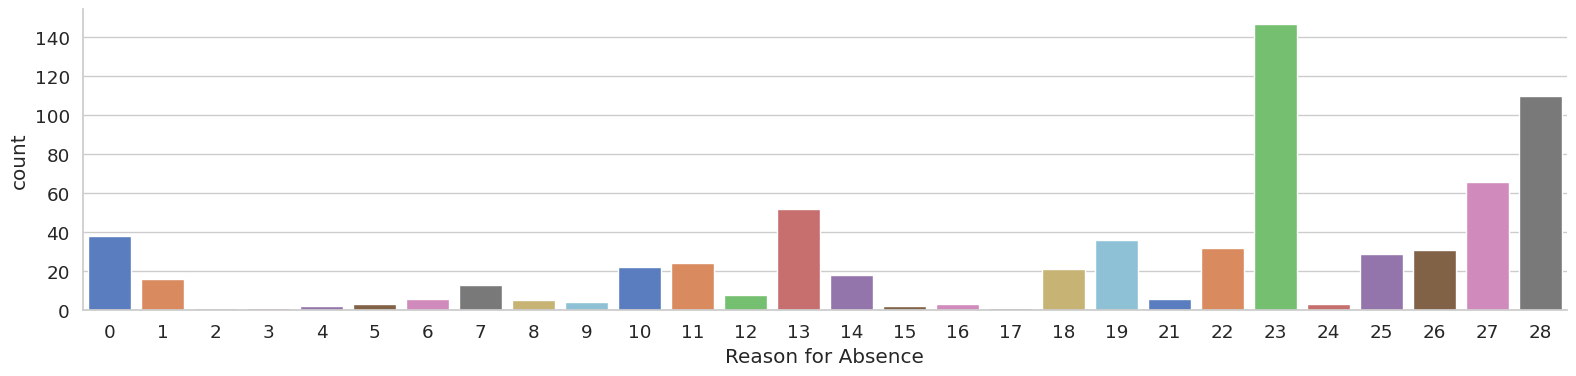

In [26]:
# graficamos como esta distribuida la variable "reason for absence"
sns.set_style("whitegrid")
sns.catplot(data=data, x='Reason for Absence', kind= 'count', height=4, aspect=4, palette='muted')

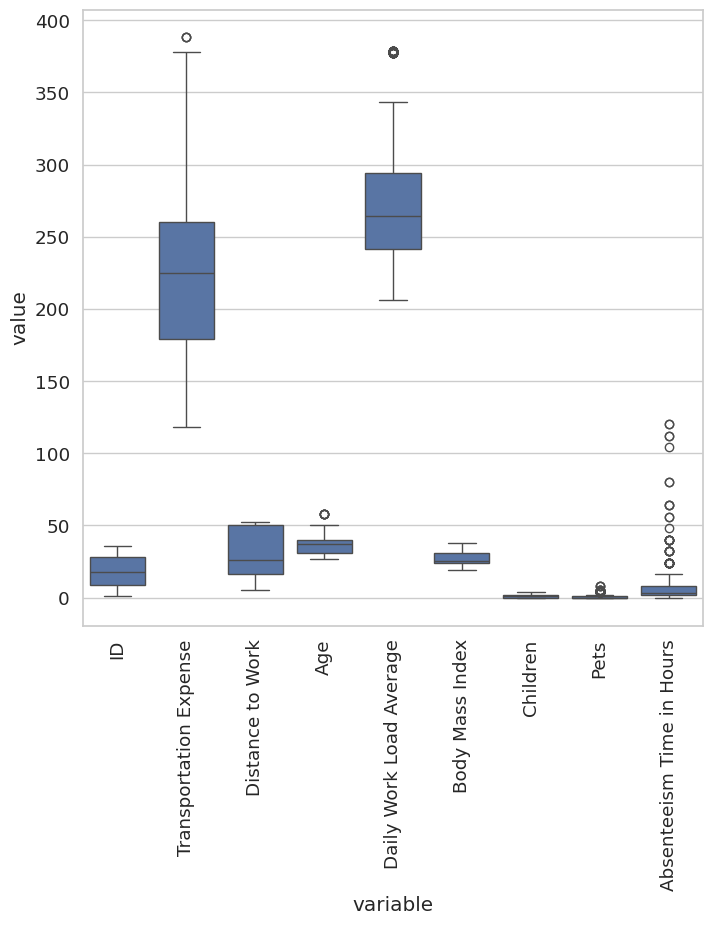

In [27]:
# Graficamos boxplots para resumir la distribución de datos cuantitativos, esto nos permite identificar rápidamente la mediana, los cuartiles, la asimetría y la presencia de valores atípicos en un conjunto de datos
plt.figure(figsize=(8,8))
sns.boxplot(x="variable", y="value", data=pd.melt(num_df))
plt.xticks(rotation=90)
plt.show()


## 2.2 - Horas de ausencia por motivo

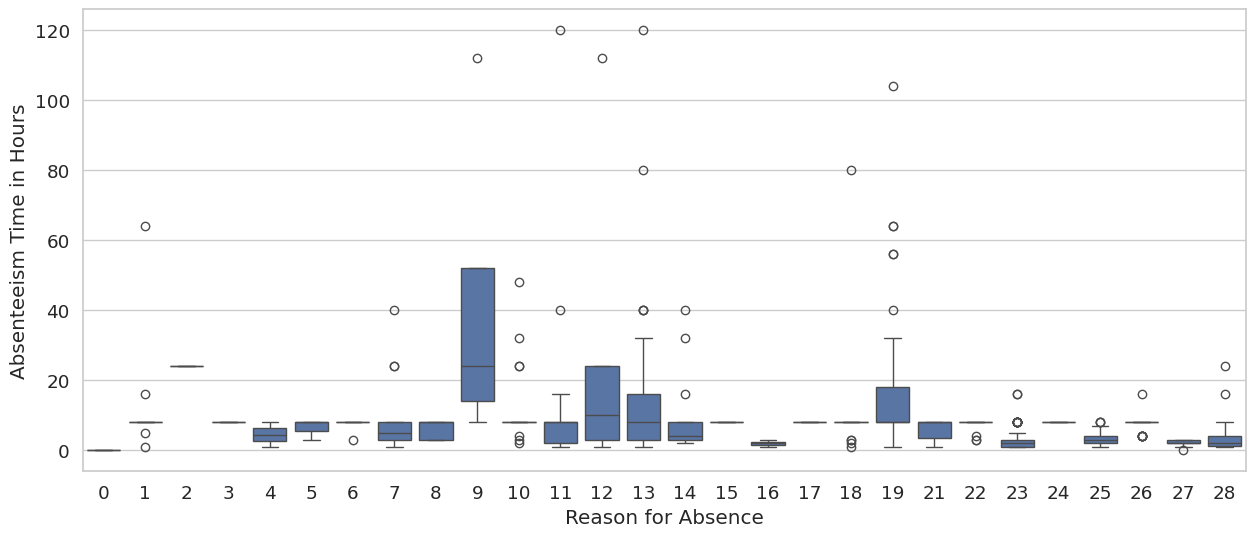

In [28]:
plt.figure(figsize = (15, 6))
sns.boxplot(x = data['Reason for Absence'], y = data['Absenteeism Time in Hours'])
plt.show()

**Lo que se puede ver en el diagrama de caja:**

El motivo 9 (enfermedades del sistema circulatorio) provoca ausencias más prolongadas, seguido del motivo 12 (enfermedades de la piel y del tejido subcutáneo).

#### **Top 5: Mayor cantidad de horas de ausencia por observación**

In [29]:
data[['ID','Month Value', 'Day of the Week','Reason for Absence', 'Absenteeism Time in Hours']] \
.sort_values(['Absenteeism Time in Hours', 'ID'], ascending = [0, 1])[:5]

,ID,Month Value,Day of the Week,Reason for Absence,Absenteeism Time in Hours
323,14,11,0,11,120
420,36,4,2,13,120
622,9,3,1,12,112
471,28,7,1,9,112
652,11,3,0,19,104


**Lo que se puede observar:**

- El empleado 14 ha estado ausente durante 120h (=15d) los lunes de noviembre durante 3 años por el motivo 11 (Enfermedades del aparato digestivo).
- El empleado 36 ha estado ausente 120h (=15d) los miercoles de abril durante 3 años por el motivo 13 (Enfermedades del sistema musculoesquelético y del tejido conectivo)
- El empleado 9 ha estado ausente 112h (=14d) los martes de marzo durante 3 años por el motivo 12 (Enfermedades de la piel y del tejido subcutáneo.)
- El empleado 28 ha estado ausente 112h (=14d) los martes de julio durante 3 años por el motivo 9 (Enfermedades del sistema circulatorio)
- El empleado 11 ha estado ausente 104h (=13d) los lunes de marzo durante 3 años por el motivo 19 (Lesiones, intoxicaciones y otras consecuencias de causas externas)

#### **Top 5: Menos horas de ausencia por observación**

In [30]:
data[['ID','Month Value', 'Day of the Week','Reason for Absence', 'Absenteeism Time in Hours']] \
.sort_values(['Absenteeism Time in Hours', 'ID'], ascending = [1, 1])[:5]

,ID,Month Value,Day of the Week,Reason for Absence,Absenteeism Time in Hours
405,1,3,3,0,0
203,2,4,0,0,0
446,3,6,4,0,0
273,5,9,3,0,0
285,5,9,3,0,0


**Lo que se puede observar:**

Hay algunas horas de ausencia = 0, motivo = 0 y también mes = 0.

Parece que el conjunto de datos contiene todos los empleados, y algunos no han estado ausentes en ciertos meses o nunca han estado ausentes (mes = 0).

# **Explorar datos mensuales, Semanales y por hora**

### **Horas de ausencia por mes y por día laborable**

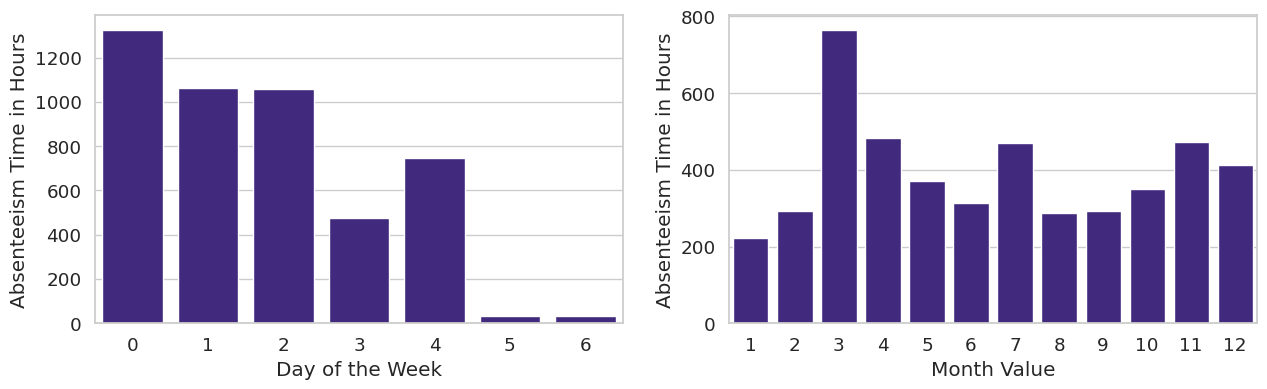

In [31]:
plt.figure(figsize = (15,4))
plt.subplot(1, 2, 1)
sns.barplot(x = data.groupby(['Day of the Week'])['Absenteeism Time in Hours'].sum().index,
            y = data.groupby(['Day of the Week'])['Absenteeism Time in Hours'].sum(),
            color = col)
plt.subplot(1, 2, 2)
sns.barplot(x = data.groupby(['Month Value'])['Absenteeism Time in Hours'].sum().index,
            y = data.groupby(['Month Value'])['Absenteeism Time in Hours'].sum(),
            color = col)
plt.show()

1. Los lunes y marzo tienen la mayor suma de horas de ausencia.

2. Pero "mes" y "día" combinados dan un resultado diferente: Los martes de Diciembre tienen la mayor suma de horas de ausencia, en segundo lugar están los Lunes de Marzo.

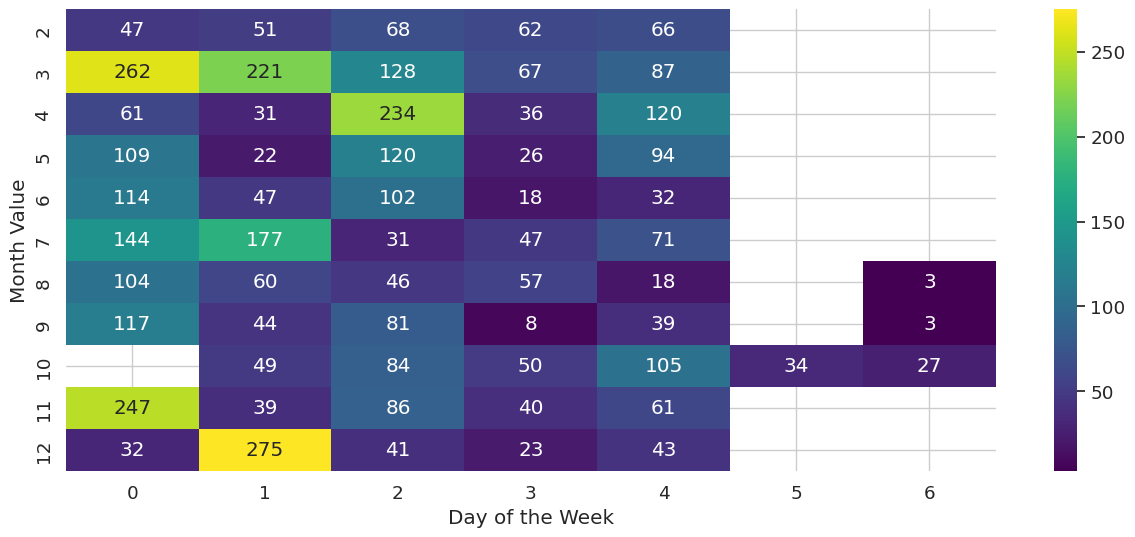

In [32]:
plt.figure(figsize = (15, 6))
sns.heatmap(data.groupby(['Month Value', 'Day of the Week'])['Absenteeism Time in Hours'].sum().unstack()[1:13],
            annot = True, fmt = 'g', cmap = cm)
plt.show()

## Número de empleados por mes y día laborable


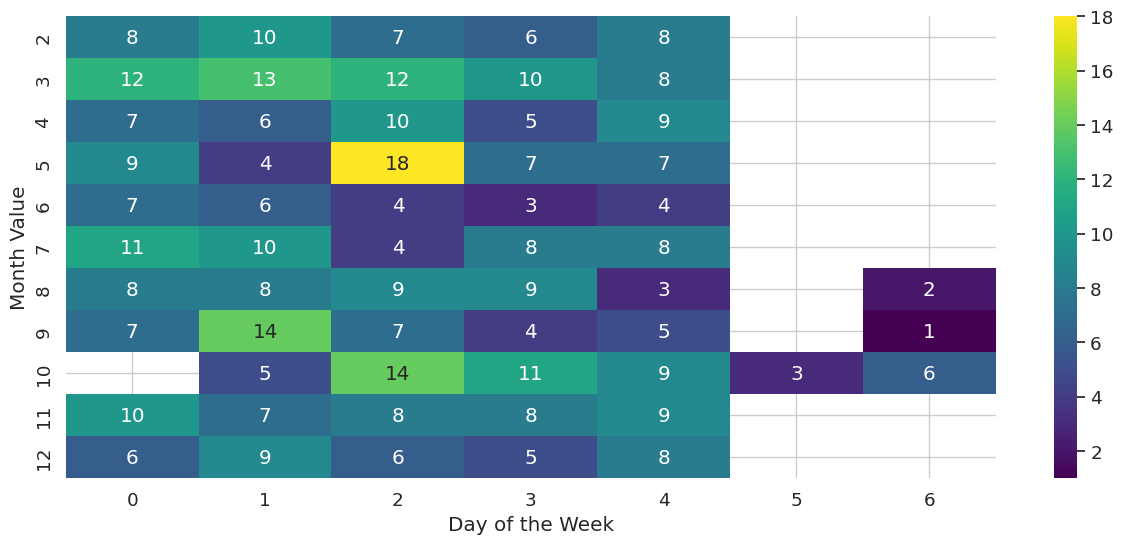

In [33]:
plt.figure(figsize = (15, 6))
sns.heatmap(data.groupby(['Month Value', 'Day of the Week'])['ID'].nunique().unstack()[1:13], cmap = cm, annot = True, fmt = 'g')
plt.show()

**Lo que se puede observar:**

La mayoría de los empleados están ausentes:
- los miércoles de mayo,
- los martes de septiembre y
- los miercoles de octubre.

**Esos análisis pueden ayudar a la empresa de dos maneras:**

1. Busque razones: ¿hubo algo especial en el pasado?

2. Prepárese para el futuro: algunos empleados/ayudantes más pueden ayudar en caso de cuellos de botella.

# Exploramos las razones
**Crear un nuevo df basado en datos por motivo**

In [34]:
# hours_per_reason = data.groupby('Reason for Absence')['Absenteeism Time in Hours'].sum()
# id_per_reason = data.groupby('Reason for Absence')['ID'].nunique()

reason_df = pd.concat([data.groupby('Reason for Absence')['Absenteeism Time in Hours'].sum(), data.groupby('Reason for Absence')['ID'].nunique()], axis=1, sort=False)
reason_df.columns = ['AbsH', 'AbsIDs']

reason_df.head(5)

,AbsH,AbsIDs
Reason for Absence,,
0,0,20
1,182,12
2,24,1
3,8,1
4,9,2


# Suma de horas de ausencia por mes y motivo
**Destacan las dos categorías principales:**

13: Enfermedades del sistema musculoesquelético y del tejido conectivo: pico en abril

19: Lesiones, intoxicaciones y otras consecuencias de causas externas (pico en marzo)

In [35]:
reason_df = reason_df.sort_values('AbsH', ascending = 0)
reason_df['cum_sum'] = reason_df['AbsH'].cumsum()
reason_df['cum_perc'] = 100 * reason_df['cum_sum'] / reason_df['AbsH'].sum()

round(reason_df[:15],1).T

Reason for Absence,13,19,23,28,11,10,22,26,18,12,1,9,14,27,7
AbsH,757.0,692.0,420.0,329.0,292.0,257.0,242.0,228.0,217.0,187.0,182.0,168.0,159.0,150.0,134.0
AbsIDs,17.0,16.0,24.0,17.0,13.0,13.0,10.0,11.0,12.0,7.0,12.0,3.0,11.0,4.0,10.0
cum_sum,757.0,1449.0,1869.0,2198.0,2490.0,2747.0,2989.0,3217.0,3434.0,3621.0,3803.0,3971.0,4130.0,4280.0,4414.0
cum_perc,16.0,30.6,39.5,46.4,52.6,58.0,63.2,68.0,72.6,76.5,80.4,83.9,87.3,90.4,93.3


## Horas de ausencia y número de empleados por persona

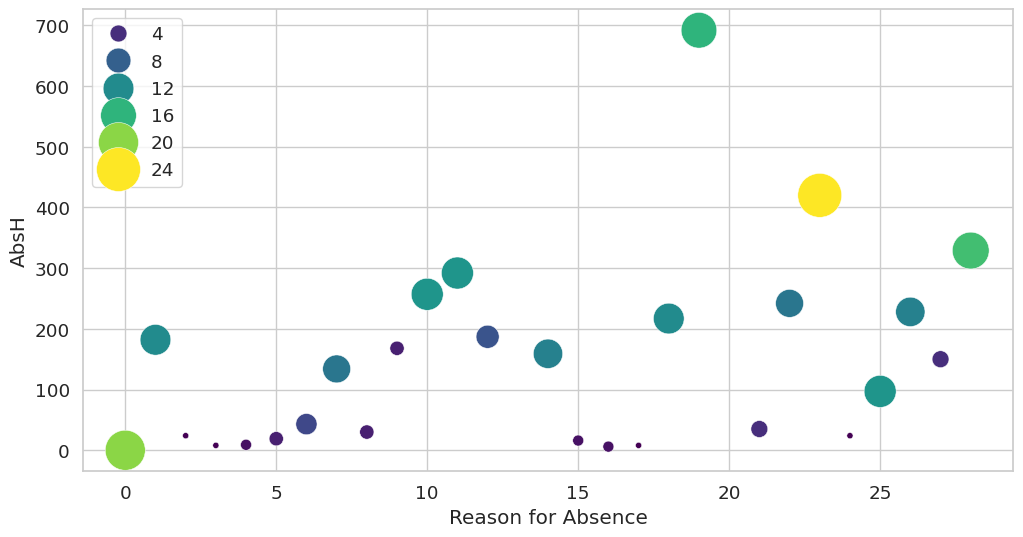

In [36]:
plt.figure(figsize = (12,6))
p1 = sns.scatterplot(x=reason_df.index[1:], y="AbsH", size="AbsIDs", hue ="AbsIDs", palette = cm,
                sizes=(20, 1000),data=reason_df[1:], markers = True)
plt.legend(loc='upper left')
plt.show()

**Lo que se puede ver:**

- El motivo 13 (sistema musculoesquelético y tejido conectivo) es el que provoca más horas de ausencia y afecta a 18 empleados.

- El motivo 19 (lesiones, intoxicaciones y otras consecuencias de causas externas) ocupa el segundo lugar, 16 empleados se ven afectados.

- El motivo 23 (consulta médica) provoca la 3ª mayor cantidad de horas de ausencia y la mayoría de los empleados (24) se ven afectados.

- La razón 20 (causas externas de morbilidad y mortalidad) incluye accidentes de tráfico: solo un código ICD-10 adicional y no incluido en ese conjunto de datos.

# Horas de ausencia acumuladas


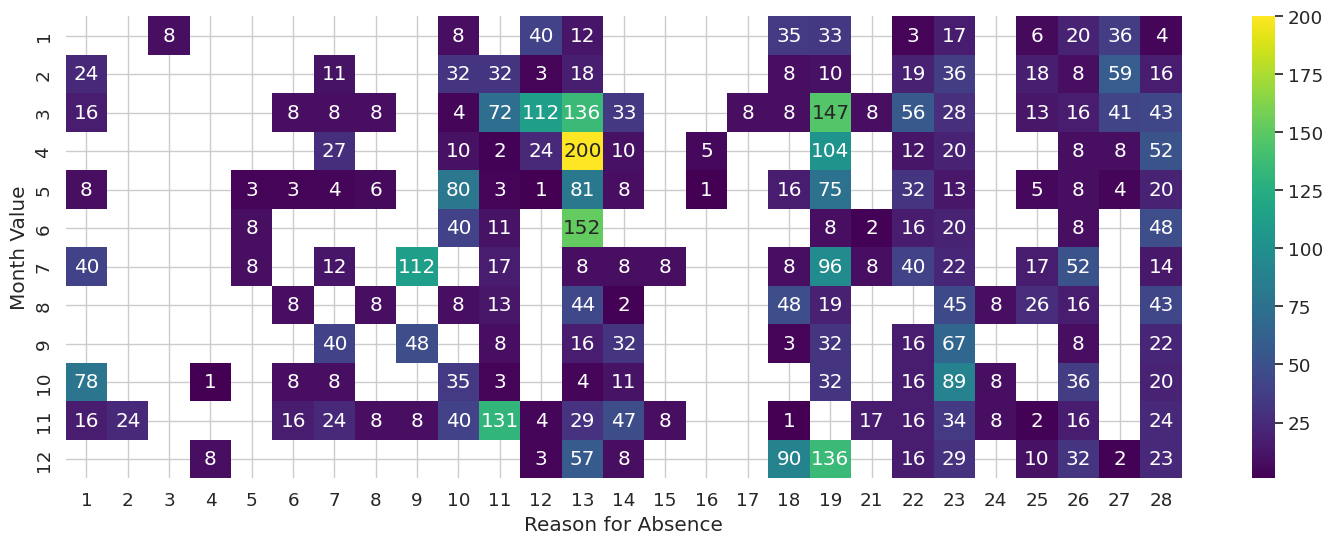

In [37]:
plt.figure(figsize = (18, 6))
sns.heatmap(data[data['Reason for Absence'] != 0].groupby(['Month Value', 'Reason for Absence'])['Absenteeism Time in Hours'].sum().unstack(),
            cmap = cm, annot = True, fmt = 'g')
plt.show()

**Lo que se puede ver:** sólo cinco motivos provocan más del 50% de las horas de ausencia

13: Enfermedades del sistema musculoesquelético y del tejido conectivo.

19: Lesiones, intoxicaciones y otras consecuencias de causas externas

23: consulta médica

28: consulta dental

11: Enfermedades del sistema digestivo

# Matríz de Correlación

## ¿Están correlacionados algunos atributos?
**Las correlaciones positivas son:**

- Edad y tiempo de servicio
- HitTargetMaximum y número de razones
- HitTargetMaximum y suma de horas de ausencia y también
- Min/Max/Mean de HitTarget,
- carga de trabajo en algunos casos

**Las correlaciones negativas son:**

- HitTargetMinimum y
- suma de horas de ausencia
- Carga de trabajo mínima y
- número de motivos

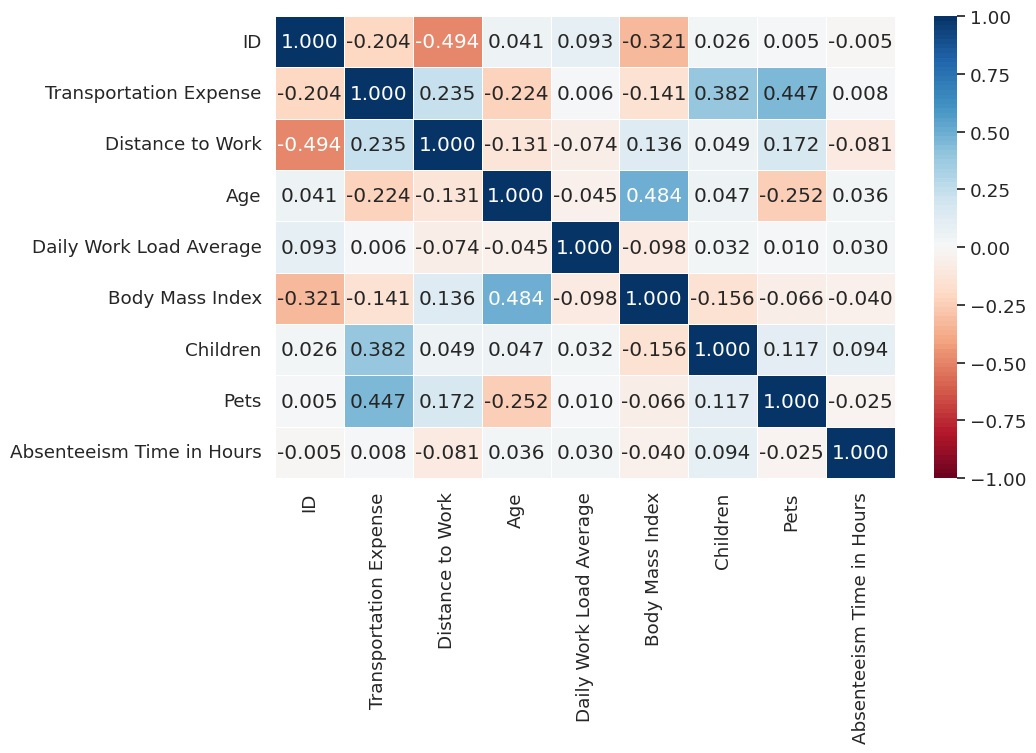

In [38]:
# creamos la matríz de correlación
num_corr = num_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(num_corr, annot=True, fmt=".3f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.color_palette("RdBu", 100))
plt.yticks(rotation=0)
plt.show()

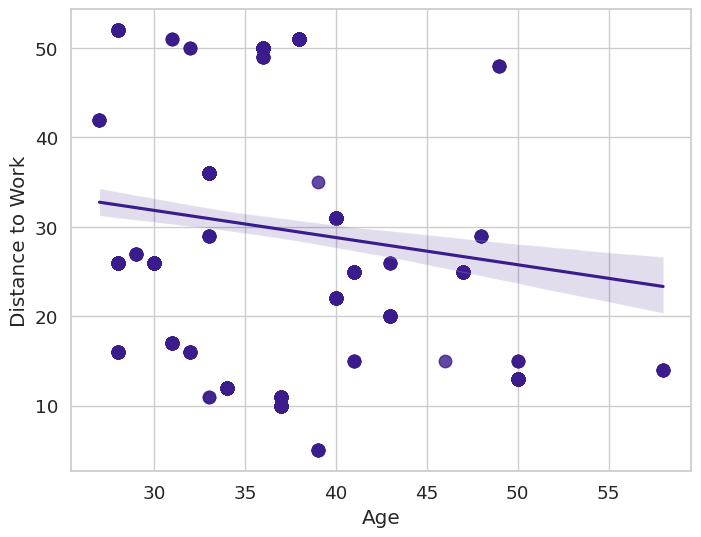

In [39]:
plt.figure(figsize = (8,6))
sns.regplot(x =data['Age'], y = data['Distance to Work'], color = col, scatter_kws = {'s':80})
plt.show()


# Preprocesamiento del dataset

In [40]:
data_prep = pd.read_csv ('original.csv')

In [41]:
data_prep.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [42]:
data_prep['Reason for Absence']

0      26
1       0
2      23
3       7
4      23
       ..
695    10
696     6
697    10
698    23
699    28
Name: Reason for Absence, Length: 700, dtype: int64

In [43]:
data_prep.drop(['ID'], axis=1, inplace=True)

In [44]:
data_prep['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

In [45]:
len(data_prep['Reason for Absence'].unique())

28

In [46]:
#En Python, podemos convertir las variables categóricas en ficticias utilizando el método get_dummies de pandas:
reason_columns = pd.get_dummies(data_prep['Reason for Absence'])

In [47]:
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [48]:
reason_columns['check'] = reason_columns.sum(axis=1)

In [49]:
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,19,21,22,23,24,25,26,27,28,check
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
696,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1
697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
698,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1


In [50]:
reason_columns['check'].unique()

array([1])

In [51]:
reason_columns = reason_columns.drop(['check'], axis = 1)

In [52]:
#El argumento de palabra clave drop_first devolverá P– 1 columnas. Lo utilizamos para evitar el problema de la multicolinealidad.
reason_columns = pd.get_dummies(data_prep['Reason for Absence'], drop_first=True)

In [53]:
data_prep.drop(['Reason for Absence'], axis=1, inplace=True)

In [54]:
#traer las que tienen 1 en las columnas de cada grupo
reason_columns.loc[:, 15:17].max(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
695    False
696    False
697    False
698    False
699    False
Length: 700, dtype: bool

In [55]:
reason_type_1 = reason_columns.loc[:, 1:14].max(axis=1)
reason_type_2 = reason_columns.loc[:, 15:17].max(axis=1)
reason_type_3 = reason_columns.loc[:, 18:21].max(axis=1)
reason_type_4 = reason_columns.loc[:, 22:].max(axis=1)

In [56]:
#Concatenar razones con el dataframe
data_prep = pd.concat([data_prep, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1)
data_prep.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,False,False,False,True
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,False,False,False,False
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,False,False,False,True
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,True,False,False,False
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,False,False,False,True


In [57]:
#Renombramos las columnas
data_prep.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3],
      dtype=object)

In [58]:
nombres = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']

In [59]:
data_prep.columns = nombres

In [60]:
data_prep.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1',
       'Reason_2', 'Reason_3', 'Reason_4'], dtype=object)

In [61]:
nombres_ordenados= ['Reason_1','Reason_2', 'Reason_3', 'Reason_4','Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']

In [62]:
df = data_prep[nombres_ordenados]

In [63]:
df.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Date',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours'], dtype=object)

In [64]:
type(df.Date[0])

str

In [65]:
type(df.Date[0])
df.Date = pd.to_datetime(df.Date, format='%d/%m/%Y')

In [66]:
df.Date.head(20)

0    2015-07-07
1    2015-07-14
2    2015-07-15
3    2015-07-16
4    2015-07-23
5    2015-07-10
6    2015-07-17
7    2015-07-24
8    2015-07-06
9    2015-07-13
10   2015-07-20
11   2015-07-14
12   2015-07-15
13   2015-07-15
14   2015-07-15
15   2015-07-17
16   2015-07-17
17   2015-07-27
18   2015-07-30
19   2015-08-05
Name: Date, dtype: datetime64[ns]

In [67]:
df.Date[0]

Timestamp('2015-07-07 00:00:00')

In [68]:
df.Date[0].month

7

In [69]:
lista_meses = []
for i in range(len(df)):
    lista_meses.append(df.Date[i].month)

In [70]:
df['Month Value'] = lista_meses
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value
0,False,False,False,True,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,False,False,False,False,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,False,False,False,True,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,True,False,False,False,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,False,False,False,True,2015-07-23,289,36,33,239.554,30,1,2,1,2,7


In [71]:
#Extraer el dia de la semana
df.Date[0].weekday()

1

In [72]:
def dia_diasemana(data):
    return data.weekday()

In [73]:
df['Day of the Week'] = df.Date.apply(dia_diasemana)

In [74]:
df.columns

Index(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Date',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours', 'Month Value', 'Day of the Week'],
      dtype='object')

In [75]:
df.Education.value_counts()

Education
1    583
3     73
2     40
4      4
Name: count, dtype: int64

In [76]:
df.Education = df.Education.map({
                            1:0,
                            2:1,
                            3:1,
                            4:1
                            })

In [77]:
df.Education.value_counts()

Education
0    583
1    117
Name: count, dtype: int64

In [78]:
df.to_csv(r'datasetpreprocesado.csv', index = False)

In [79]:
df_preprocesado = pd.read_csv('datasetpreprocesado.csv')
df_preprocesado.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,False,False,False,True,2015-07-07,289,36,33,239.554,30,0,2,1,4,7,1
1,False,False,False,False,2015-07-14,118,13,50,239.554,31,0,1,0,0,7,1
2,False,False,False,True,2015-07-15,179,51,38,239.554,31,0,0,0,2,7,2
3,True,False,False,False,2015-07-16,279,5,39,239.554,24,0,2,0,4,7,3
4,False,False,False,True,2015-07-23,289,36,33,239.554,30,0,2,1,2,7,3


# Modelo de Machine Learning

Se probará un modelo de regresión logística para clasificar a las personas en 2 clases:
* personas con excesiva ausencia laboral
* personas con moderada ausencia laboral.

La media de las horas de ausencia laboral es 3. Se plantea la siguiente hipótesis: ¿Cómo definimos las clases? Moderada ausencia si las horas son menores o iguales a 3 y excesivas si son mayores a 4 horas.

Lo que se hace ahora es cambiar las horas 1,2,3 por la clase 0 (Moderada) y 4,5,6,7,8… por la clase 1 (Excesivo). Para esto se usara la función where de python.

In [80]:
df_preprocesado['Absenteeism Time in Hours'].median()

3.0

In [81]:
#devuelve 1 si consigue horas 3 mayores a 3 y 0 si no cumple con esto, es decir, menores o iguales a 3
targets = np.where(df_preprocesado['Absenteeism Time in Hours']>3, 1, 0)
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [82]:
df_preprocesado['Excessive Absenteeism'] = targets
df_preprocesado.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week,Excessive Absenteeism
0,False,False,False,True,2015-07-07,289,36,33,239.554,30,0,2,1,4,7,1,1
1,False,False,False,False,2015-07-14,118,13,50,239.554,31,0,1,0,0,7,1,0
2,False,False,False,True,2015-07-15,179,51,38,239.554,31,0,0,0,2,7,2,0
3,True,False,False,False,2015-07-16,279,5,39,239.554,24,0,2,0,4,7,3,1
4,False,False,False,True,2015-07-23,289,36,33,239.554,30,0,2,1,2,7,3,0


In [83]:
# “se recomienda un balance para 2 clases del 50 % de datos entre estas. En
# este caso un 60/40 % funcionaría bien para el algoritmo de regresión
# logística"

print('Porcentaje total de personas con excesiva ausencia laboral',targets.sum()*100 / targets.shape[0])
print('Porcentaje total de personas con moderada ausencia laboral',100 - targets.sum()*100 / targets.shape[0])

Porcentaje total de personas con excesiva ausencia laboral 45.57142857142857
Porcentaje total de personas con moderada ausencia laboral 54.42857142857143


In [84]:
targets.shape

(700,)

In [85]:
df_preprocesado.drop(['Absenteeism Time in Hours'], axis=1, inplace=True)

df_preprocesado.drop(['Date'], axis=1, inplace=True)

df_preprocesado.shape



(700, 15)

In [86]:
df_preprocesado.columns

Index(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Month Value', 'Day of the Week', 'Excessive Absenteeism'],
      dtype='object')

In [87]:
#Seleccionar las inputs del modelo
inputs = df_preprocesado.iloc[:,:-1]

In [88]:
#Standarizacion de la data
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
data_escalada = StandardScaler()

In [89]:
data_escalada.fit(inputs)

StandardScaler()

In [90]:
escalada_inputs = data_escalada.transform(inputs)

In [91]:
class CustomScaler(BaseEstimator, TransformerMixin):

    def __init__(self, columns=None, copy=True, with_mean=True, with_std=True):
        self.scaler = StandardScaler(copy=copy, with_mean=with_mean, with_std=with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns])
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self

    def transform(self, X, y=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:, ~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [92]:
columnas_a_escalar = ['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Month Value', 'Day of the Week']

In [93]:
# Crear una instancia de CustomScaler
escalado = CustomScaler(columns=columnas_a_escalar)

# Ajustar el escalado a tus datos
escalado.fit(inputs)

# Transformar tus datos
escalada_inputs = escalado.transform(inputs)

In [94]:
escalada_inputs

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Month Value,Day of the Week
0,False,False,False,True,1.005844,0.412816,-0.536062,-0.806331,0.767431,-0.447980,0.880469,0.268487,0.182726,-0.683704
1,False,False,False,False,-1.574681,-1.141882,2.130803,-0.806331,1.002633,-0.447980,-0.019280,-0.589690,0.182726,-0.683704
2,False,False,False,True,-0.654143,1.426749,0.248310,-0.806331,1.002633,-0.447980,-0.919030,-0.589690,0.182726,-0.007725
3,True,False,False,False,0.854936,-1.682647,0.405184,-0.806331,-0.643782,-0.447980,0.880469,-0.589690,0.182726,0.668253
4,False,False,False,True,1.005844,0.412816,-0.536062,-0.806331,0.767431,-0.447980,0.880469,0.268487,0.182726,0.668253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,True,False,False,False,-0.654143,-0.533522,0.562059,-0.853789,-1.114186,2.232242,0.880469,-0.589690,-0.388293,-0.007725
696,True,False,False,False,0.040034,-0.263140,-1.320435,-0.853789,-0.643782,-0.447980,-0.019280,1.126663,-0.388293,-0.007725
697,True,False,False,False,1.624567,-0.939096,-1.320435,-0.853789,-0.408580,2.232242,-0.919030,-0.589690,-0.388293,0.668253
698,False,False,False,True,0.190942,-0.939096,-0.692937,-0.853789,-0.408580,2.232242,-0.919030,-0.589690,-0.388293,0.668253


In [95]:
from sklearn.model_selection import train_test_split
#train_test_split(escalada_inputs, targets )

In [96]:
X_train, X_test, y_train, y_test = train_test_split(escalada_inputs, targets, test_size=0.20)


In [97]:
print(X_train.shape, y_train.shape)

(560, 14) (560,)


In [98]:
print(X_test.shape, y_test.shape)

(140, 14) (140,)


In [99]:
X_train.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Month Value,Day of the Week
217,True,False,False,False,-0.654143,1.426749,0.248310,2.677510,1.002633,-0.44798,-0.919030,-0.589690,-0.388293,-0.683704
634,True,False,False,False,-0.654143,1.426749,0.248310,-1.240355,1.002633,-0.44798,-0.919030,-0.589690,-0.959313,-1.359682
58,False,False,False,False,2.213108,-0.871500,-0.849811,-0.758273,-0.408580,-0.44798,1.780219,-0.589690,0.753746,-0.007725
469,False,False,False,True,0.190942,-0.060353,1.817054,-1.037971,1.473038,-0.44798,-0.019280,3.701192,0.182726,-1.359682
303,False,False,False,False,0.190942,-0.668713,1.032682,-0.169648,2.649049,-0.44798,-0.019280,-0.589690,1.039256,2.696187


# Modelo de Regresión Logistica

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [101]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [102]:
reg.score(X_train, y_train)

0.7714285714285715

In [103]:
reg.score(X_test, y_test)

0.7642857142857142

In [104]:
#Guardar Modelo
import pickle
with open('model', 'wb') as file:
    pickle.dump(reg,file)

In [105]:
salida = reg.predict(X_train)

In [106]:
salida

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,

In [107]:
salida == y_train

array([False,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True, False,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,

In [108]:
np.sum(salida==y_train)/salida.shape[0]

0.7714285714285715

In [109]:
#Calculando coefiecientes e interseccion
reg.intercept_

array([-1.5833746])

In [110]:
reg.coef_

array([[ 2.65378549,  0.85019843,  2.91110939,  0.75406262,  0.67176337,
         0.02887983, -0.15820924,  0.02751824,  0.19578608, -0.00319122,
         0.39503214, -0.30972451,  0.03112337, -0.20442161]])

In [111]:
feature_name = inputs.columns.values

# Evaluación del modelo

In [112]:


summary_table = pd.DataFrame(columns=['Caracteristica'], data = feature_name)
summary_table['Coeficiente'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Interseccion', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table['Odds_ratio'] = np.exp(summary_table.Coeficiente)
summary_table



,Caracteristica,Coeficiente,Odds_ratio
0,Interseccion,-1.583375,0.205281
1,Reason_1,2.653785,14.207720
2,Reason_2,0.850198,2.340111
3,Reason_3,2.911109,18.377175
4,Reason_4,0.754063,2.125618
5,Transportation Expense,0.671763,1.957686
6,Distance to Work,0.028880,1.029301
7,Age,-0.158209,0.853671
8,Daily Work Load Average,0.027518,1.027900
9,Body Mass Index,0.195786,1.216267


El entrenamiento y la puntuación de un modelo de regresión logística proporcionan una comprensión vital sobre la importancia de cada característica en la predicción del resultado. Los coeficientes más grandes indican una mayor influencia de esa característica en el resultado. Por otro lado, los coeficientes más pequeños indican una influencia menor.

En nuestro caso, las características están estandarizadas, lo que significa que tienen la misma escala, lo que nos permite comparar su importancia directamente. Cuando aplicamos la regresión logística, obtenemos el logaritmo de las odds (oportunidades) como resultado. La transformación logarítmica nos permite clasificar el resultado en 0 o 1.

El valor de odds_ratio proporciona una perspectiva importante: por ejemplo, para la razón 3, que tiene un odds_ratio mayor, indica que una persona con esta razón tiene aproximadamente 18 veces más probabilidades de estar excesivamente ausente que una persona que no presenta esta razón. Este análisis resume de manera efectiva cómo cada característica afecta las probabilidades de que ocurra el evento de interés.

In [113]:
summary_table.sort_values('Odds_ratio', ascending=False)

,Caracteristica,Coeficiente,Odds_ratio
3,Reason_3,2.911109,18.377175
1,Reason_1,2.653785,14.207720
2,Reason_2,0.850198,2.340111
4,Reason_4,0.754063,2.125618
5,Transportation Expense,0.671763,1.957686
11,Children,0.395032,1.484432
9,Body Mass Index,0.195786,1.216267
13,Month Value,0.031123,1.031613
6,Distance to Work,0.028880,1.029301
8,Daily Work Load Average,0.027518,1.027900


Se puede concluir que la razón con el mayor coeficiente y, por ende, el mayor impacto en la ausencia laboral es la Razón 3, que abarca síntomas graves poco comunes y envenenamiento. Este resultado tiene sentido, ya que es comprensible que alguien no asista al trabajo de inmediato en tales circunstancias.

La segunda razón con mayor impacto es la Razón 1, relacionada con problemas circulatorios, respiratorios, digestivos, entre otros. Es comprensible que alguien falte al trabajo debido a malestares estomacales, dolor abdominal, náuseas, etc. Una persona con esta razón tiene aproximadamente 14 veces más probabilidades de ausentarse excesivamente que alguien sin esta razón.

La Razón 2 está relacionada con embarazo y fiestas de cumpleaños. Es lógico que esta razón tenga una baja probabilidad de ausencia excesiva, ya que los días de licencia por embarazo suelen ser limitados, y las fiestas de cumpleaños de los hijos no ocupan mucho tiempo en el año.

El costo del transporte es la variable más relevante entre las no categóricas, aunque al estar estandarizada, su interpretación directa en términos de odds es limitada.

Los modelos estandarizados son preferidos por ingenieros en machine learning cuando se busca una alta precisión, ya que el algoritmo tiende a funcionar mejor con datos estandarizados. Sin embargo, los economistas y estadistas suelen priorizar la interpretación de variables sobre la precisión. Los científicos de datos se encuentran en un punto intermedio, ya que a veces necesitan alta precisión y otras veces valoran otras consideraciones.







# Guardar el Modelo y Deploy

In [114]:
import pickle

#Guardando el modelo
with open('model', 'wb') as file:
    pickle.dump(reg, file)

#Guardando la data estandarizada
with open('scaler', 'wb') as file:
    pickle.dump(escalado, file)


# Cita Bibliográficas
**Citas Bibliográficas** =

         
    Title   = {Estadística práctica para ciencia de datos con R y Python},
    Author  = {Peter Bruce, Andrew Bruce y Peter Gedeck},
    Year    = {2022},
    Pages   = {203 – 214},
    Editors = {Marcombo y O’Reilly.},
    ISBN    = {978-84-267-3443-3},
    url     = {http://www.marcambro.info}

    









